In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import os

In [3]:
# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
## X데이터의 shape를 (60000, 28, 28, 1) 모양으로 바꾸어 주어야 함
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255 # 0~1정규화
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255  # 0~1정규화
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

In [7]:
X_train[2].shape

(28, 28, 1)

In [10]:
X_train[2][:, :, 0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


c:\Users\jeong\anaconda3-1\envs\py310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [18]:

# 모델 최적화를 위한 설정 구간입니다.
MODEL_DIR = './data/model_cnn/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)


In [20]:

modelpath="./data/model_cnn/MNIST_CNN.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, 
                               save_best_only=True)  # 저장할 때 가장 좋은 모델 선택
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5,
                                        restore_best_weights=True) # 가장 좋은 모델로 restore

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, 
                    verbose=1, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.8026 - loss: 0.6392
Epoch 1: val_loss improved from inf to 0.08820, saving model to ./data/model_cnn/MNIST_CNN.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 51s 196ms/step - accuracy: 0.8031 - loss: 0.6378 - val_accuracy: 0.9735 - val_loss: 0.0882
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9640 - loss: 0.1222
Epoch 2: val_loss improved from 0.08820 to 0.05858, saving model to ./data/model_cnn/MNIST_CNN.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 81s 192ms/step - accuracy: 0.9640 - loss: 0.1221 - val_accuracy: 0.9828 - val_loss: 0.0586
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9756 - loss: 0.0756
Epoch 3: val_loss improved from 0.05858 to 0.05267, saving model to ./data/model_cnn/MNIST_CNN.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 180ms/step - accuracy: 0.9756 - loss: 0.0756 - val_accuracy: 0.9838 - val_loss: 0.0527
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.9808 - lo

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,599,648 (13.73 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,399,766 (9.15 MB)

In [22]:
import pandas as pd
df_history = pd.DataFrame(history.history)
df_history

,accuracy,loss,val_accuracy,val_loss
0,0.900511,0.331277,0.973467,0.088202
1,0.967689,0.109035,0.982800,0.058576
2,0.976200,0.076866,0.983800,0.052672
3,0.981422,0.059894,0.985533,0.050441
4,0.984422,0.049353,0.986733,0.044239
5,0.986267,0.044355,0.987800,0.043240
6,0.988111,0.037925,0.987400,0.048112
7,0.989444,0.032064,0.987733,0.043213
8,0.990911,0.028973,0.986733,0.051073
9,0.991267,0.026267,0.988667,0.045123


<Axes: >

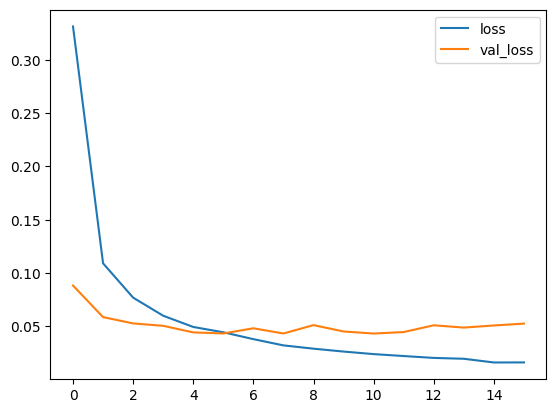

In [23]:
df_history[['loss', 'val_loss']].plot()

<Axes: >

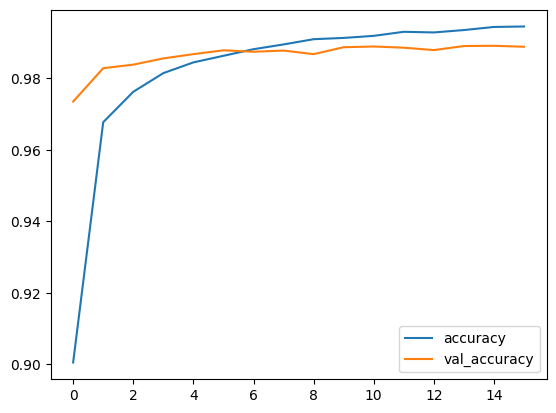

In [24]:
df_history[['accuracy', 'val_accuracy']].plot()

In [25]:
model.output_shape

(None, 10)

In [36]:
model.predict(X_test[:1]).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


7

In [ ]:
model.evaluate(X_test, y_test)

@@@ 오답 @@@
Y값 9 != 예측값 8


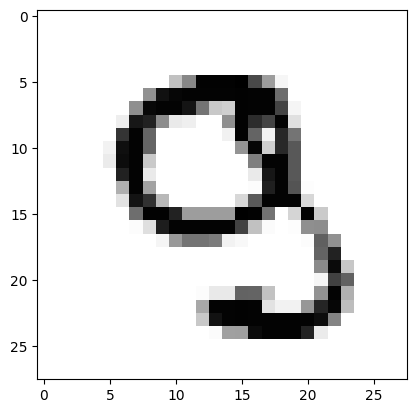

@@@ 오답 @@@
Y값 5 != 예측값 3


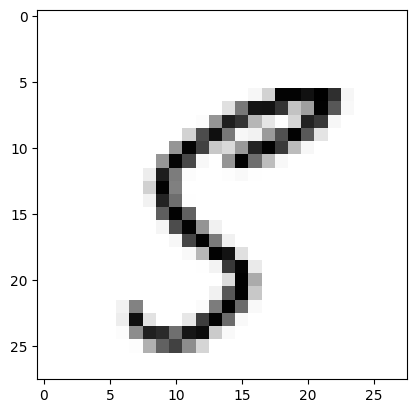

@@@ 오답 @@@
Y값 2 != 예측값 7


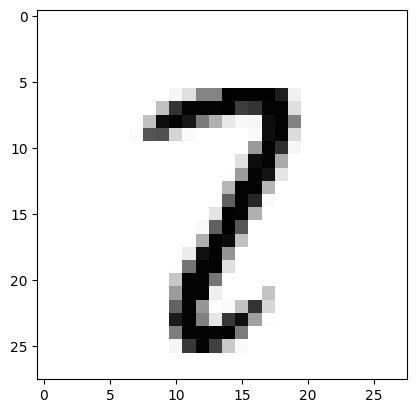

@@@ 오답 @@@
Y값 6 != 예측값 0


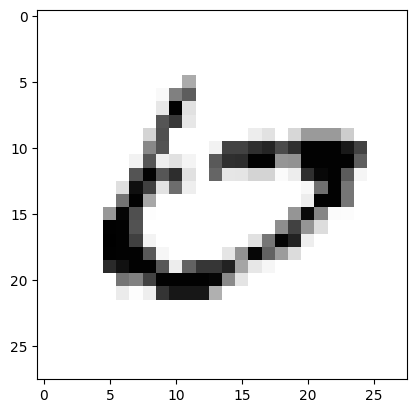

@@@ 오답 @@@
Y값 3 != 예측값 5


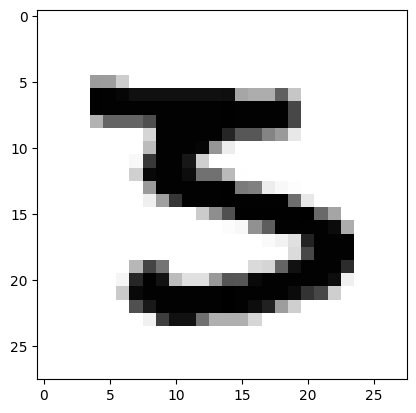

@@@ 오답 @@@
Y값 7 != 예측값 3


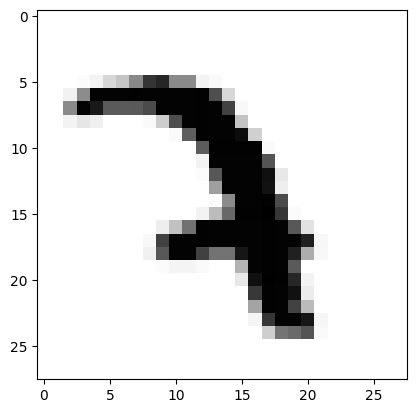

@@@ 오답 @@@
Y값 1 != 예측값 7


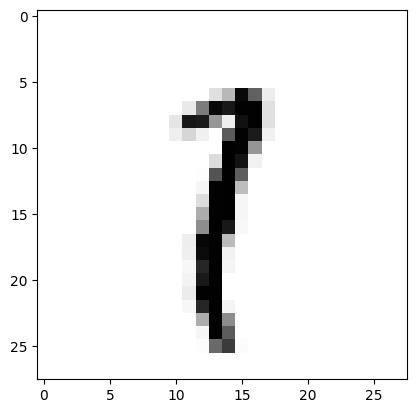

@@@ 오답 @@@
Y값 0 != 예측값 6


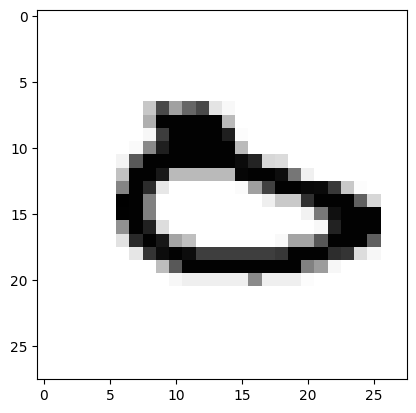

@@@ 오답 @@@
Y값 9 != 예측값 7


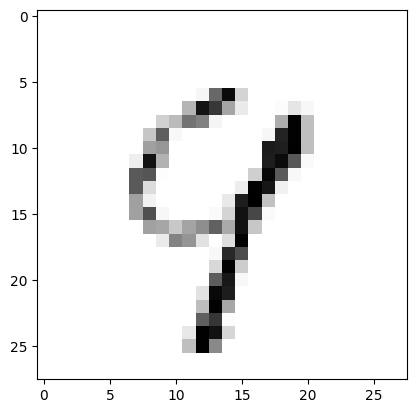

@@@ 오답 @@@
Y값 3 != 예측값 5


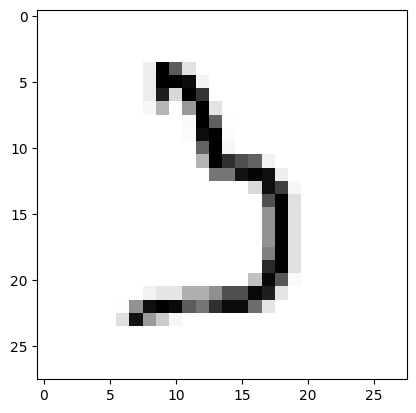

@@@ 오답 @@@
Y값 6 != 예측값 5


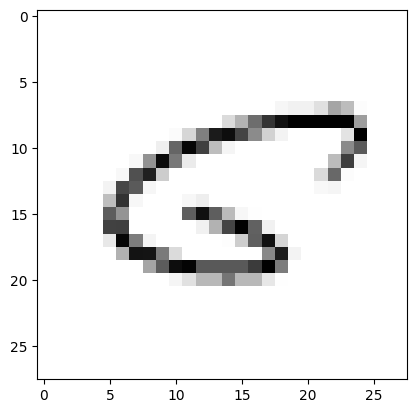

@@@ 오답 @@@
Y값 8 != 예측값 1


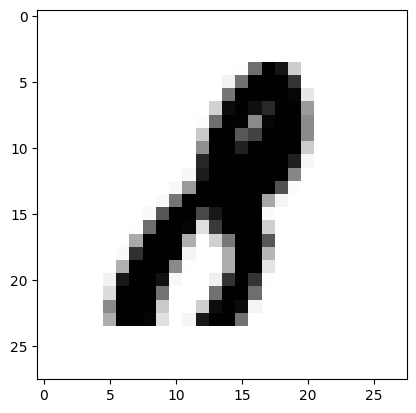

@@@ 오답 @@@
Y값 7 != 예측값 2


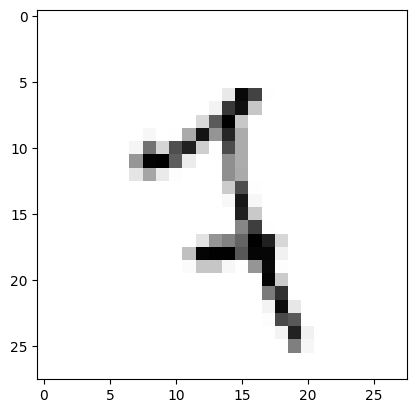

@@@ 오답 @@@
Y값 7 != 예측값 2


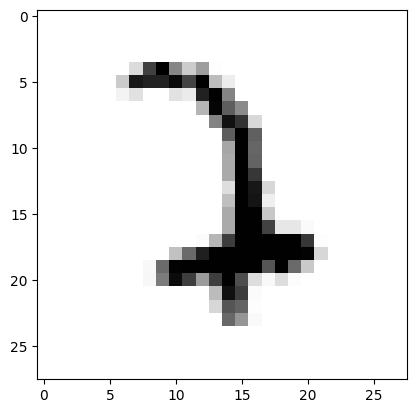

@@@ 오답 @@@
Y값 9 != 예측값 4


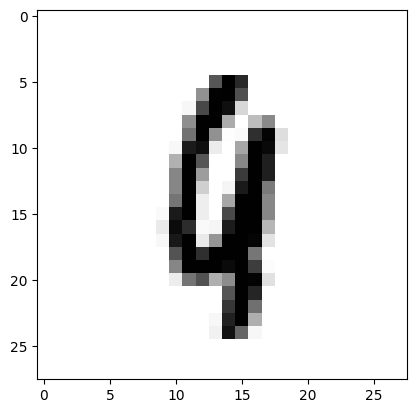

@@@ 오답 @@@
Y값 9 != 예측값 5


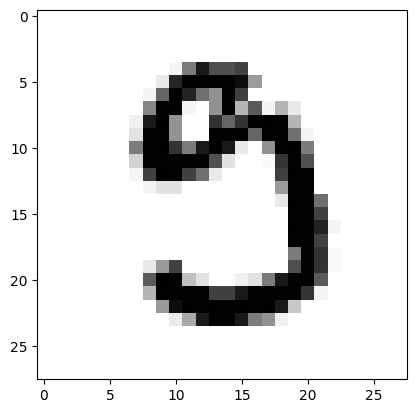

@@@ 오답 @@@
Y값 8 != 예측값 0


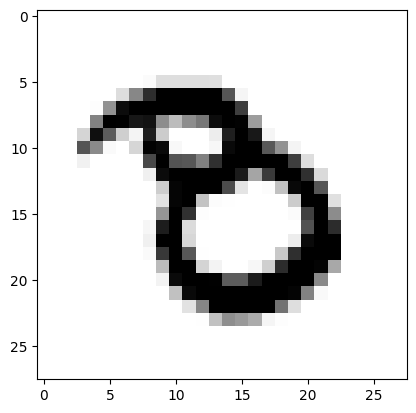

@@@ 오답 @@@
Y값 5 != 예측값 3


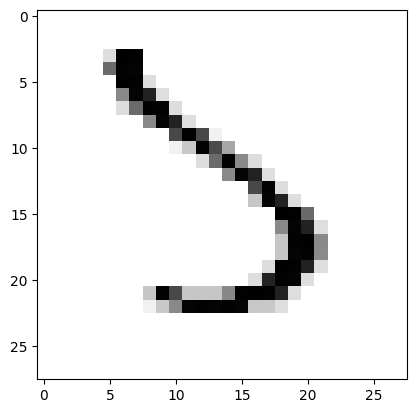

@@@ 오답 @@@
Y값 8 != 예측값 7


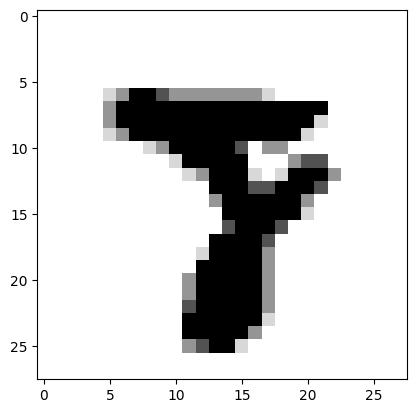

@@@ 오답 @@@
Y값 0 != 예측값 6


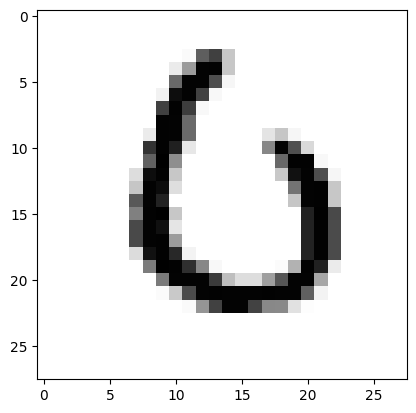

@@@ 오답 @@@
Y값 9 != 예측값 8


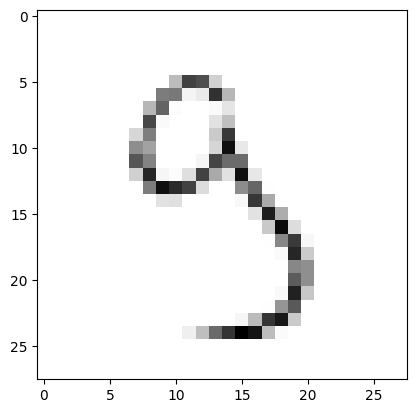

@@@ 오답 @@@
Y값 2 != 예측값 7


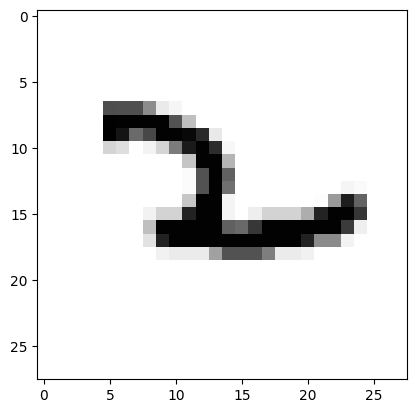

In [39]:
#############################################################
# Test data 중 오답 print
#############################################################
for i in range(len(X_test)):
    predicted = model.predict(X_test[i:i+1], verbose=0).argmax()
    if y_test[i].argmax() != predicted:
        print("@@@ 오답 @@@")
        print(f"Y값 {y_test[i].argmax()} != 예측값 {predicted}")
        plt.imshow(X_test[i].reshape(28, 28), cmap='Greys' )  
        plt.show()